<a href="https://colab.research.google.com/github/FGalvao77/Regressao-Linear-com-Python---Hands-on/blob/main/Regress%C3%A3o_Linear_com_Python_Hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear com Python - Hands-on!**

---



In [1]:
# importando biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

In [2]:
# biblioteca para exibicão do vídeo-aula no ambiente do google colab
from IPython.display import YouTubeVideo

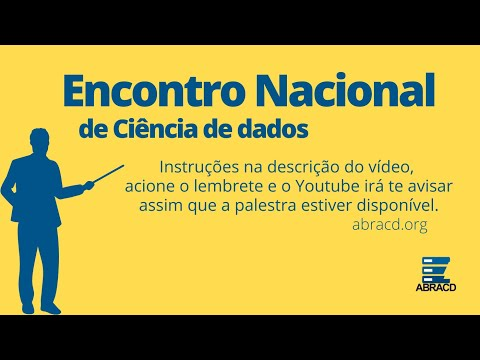

In [3]:
# vídeo-aula - Regressão Linear com Python
YouTubeVideo('T8kTSJZ84P4', width = 720, height = 480)

O dataset utilizado foi extraído do [Kaggle](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo).

In [4]:
# instanciando o conjunto de dados da url
url = 'https://raw.githubusercontent.com/FGalvao77/datasets/main/Consumo_cerveja.csv'

In [5]:
# importando a biblioteca para modelagem de dados
import pandas as pd

In [6]:
# carregando o conjunto de dados no objeto "df"
df = pd.read_csv(url)

In [7]:
# visualizando as 5 primeiras linhas do dataframe
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [8]:
# dimensão do dataframe
df.shape    # linhas e atributos (colunas)

(941, 7)

In [9]:
# nome dos atributos (colunas)
df.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [10]:
# contabilizando observaçãoes duplicadas
df.duplicated().sum()

575

In [11]:
# removendo observações duplicadas
df.drop_duplicates(inplace = True, keep = False)

In [12]:
# contabilizando a presença de valores ausentes (NaN) nos atributos
df.isna().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [13]:
# agregando a função ".any()", temos uma resposta boleana na presença de valores nulos/ausentes
df.isnull().sum().any()     # resposta: True (Verdadeiro) | False (falso)

False

In [14]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [15]:
# visualizando o tipo de dados
df.dtypes

Data                            object
Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

> Perceba que, apenas os dois últimos atributos são do tipo numérico, já as demais são do tipo `object`. E isso é um problema, e portanto devemos tratar e converter as observções conforme sua natureza.

In [16]:
# realizando um "for" para substituir a vírgula por ponto e convertendo para o tipo numérico
# for col in df.select_dtypes(include=object).columns[1:]:
#     df[col] = pd.to_numeric(df[col].str.replace(',', '.'))

for col in df.select_dtypes(include = 'O').columns[1:]:     # excluindo o primeiro atributo, já que o mesmo é uma data e necessita de outro tipo de tratamento
    df[col] = pd.to_numeric(df[col].str.replace(',', '.'))

In [17]:
# visualizando se o tipo do dado foi atualizado
df.dtypes[1:]

Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

In [18]:
# visualizando 5 amostras aleatórias, após o tratamento dos atributos
df.iloc[:, 1:].sample(5)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
104,21.94,18.5,27.4,0.0,0.0,23.469
306,21.86,19.5,25.6,3.4,0.0,22.741
195,20.18,17.2,27.6,0.0,0.0,28.742
265,26.14,18.3,34.0,0.0,0.0,32.589
297,17.64,15.7,19.2,0.0,1.0,26.594


In [19]:
# aplicando tratamento no atributo "Data" e convertendo para o tipo "datetime"
df['Data'] = pd.to_datetime(df['Data'], format = '%Y-%m-%d')

In [20]:
# visualizando se o tipo de dado foi atualizado conforme o interesse
df.dtypes[0], df['Data'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [21]:
# visualizando 5 amostras aleatórias do atributo "Data"
df['Data'].sample(5)

287   2015-10-15
19    2015-01-20
121   2015-05-02
223   2015-08-12
200   2015-07-20
Name: Data, dtype: datetime64[ns]

In [22]:
# nome dos atributos
df.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

> Vamos renomear os atributos, deixando-os mais "enxutos".

In [23]:
# renomeando os atributos
df.rename(
    columns = {
        'Temperatura Media (C)': 'temp_mean',
        'Temperatura Minima (C)': 'temp_min',
        'Temperatura Maxima (C)': 'temp_max',
        'Precipitacao (mm)': 'precipitacao',
        'Final de Semana': 'final_semana',
        'Consumo de cerveja (litros)': 'consumo_cerveja'
    }, 
    inplace = True
)

In [24]:
# visualizando as 5 últimas linhas do conjunto de dados
df.tail(10)

,Data,temp_mean,temp_min,temp_max,precipitacao,final_semana,consumo_cerveja
355,2015-12-22,24.60,19.6,32.4,43.0,0.0,26.828
356,2015-12-23,27.46,22.1,32.4,3.0,0.0,26.468
357,2015-12-24,24.72,20.5,31.5,3.4,0.0,31.572
358,2015-12-25,23.58,17.8,31.0,39.0,0.0,26.308
359,2015-12-26,23.34,17.8,29.8,94.8,1.0,21.955
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467
364,2015-12-31,24.76,20.2,29.0,0.0,0.0,22.446


In [25]:
# informações gerais do conjunto de dados após os tratamentos realizados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             365 non-null    datetime64[ns]
 1   temp_mean        365 non-null    float64       
 2   temp_min         365 non-null    float64       
 3   temp_max         365 non-null    float64       
 4   precipitacao     365 non-null    float64       
 5   final_semana     365 non-null    float64       
 6   consumo_cerveja  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


In [26]:
# estatística descritiva do conjunto de dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp_mean,365.0,21.226356,3.180108,12.900,19.020,21.380,23.280,28.860
temp_min,365.0,17.461370,2.826185,10.600,15.300,17.900,19.600,24.500
temp_max,365.0,26.611507,4.317366,14.500,23.800,26.900,29.400,36.500
precipitacao,365.0,5.196712,12.417844,0.000,0.000,0.000,3.200,94.800
final_semana,365.0,0.284932,0.452001,0.000,0.000,0.000,1.000,1.000
consumo_cerveja,365.0,25.401367,4.399143,14.343,22.008,24.867,28.631,37.937


In [27]:
# correlação entre as variáveis
df.corr()

,temp_mean,temp_min,temp_max,precipitacao,final_semana,consumo_cerveja
temp_mean,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
temp_min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
temp_max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
precipitacao,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
final_semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consumo_cerveja,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


In [28]:
# visualizando as 10 primeiras temperaturas mínimas mais constante
df['temp_min'].value_counts().head(10)

19.3    11
18.2    11
19.6     9
19.7     8
17.2     8
18.9     7
19.2     7
18.6     7
14.1     6
20.5     6
Name: temp_min, dtype: int64

In [29]:
# importando as bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

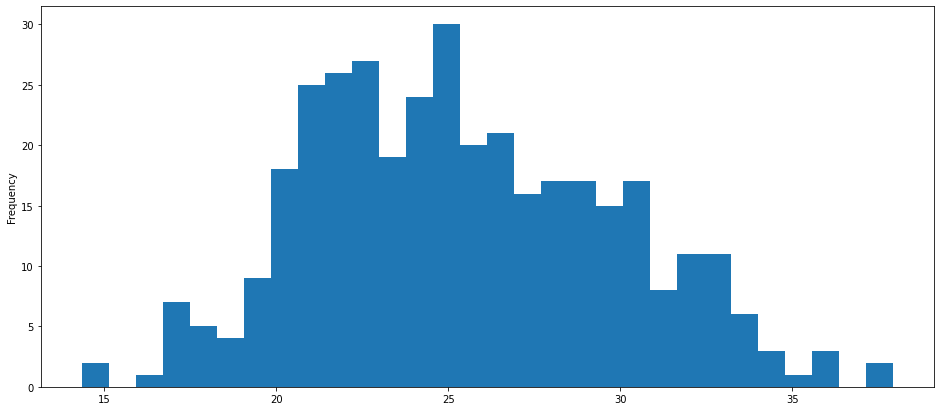

In [30]:
# com o gráfico de histograma visualizando a distribuição dos dados da variável alvo "consumo_cerveja"
plt.figure(figsize=(16, 7))
df['consumo_cerveja'].plot(kind = 'hist', bins = 30);

In [31]:
# função para contabilizar as observações presentes no atributo - gráficos de barras
def count_plot(data, label_size = 12,
               xlabel = '',
               ylabel = '',
               style = 'white'):
    
    sns.set(rc = {
        'figure.figsize': (16, 7),
        'xtick.labelsize': label_size,
        'ytick.labelsize': label_size
        })
    
    sns.set_style(style)
    count_plot = sns.countplot(x = data)
    count_plot.set_title('Countplot de ' + data.name, fontsize = 15)
    count_plot.set(xlabel = xlabel,
                   ylabel = ylabel)

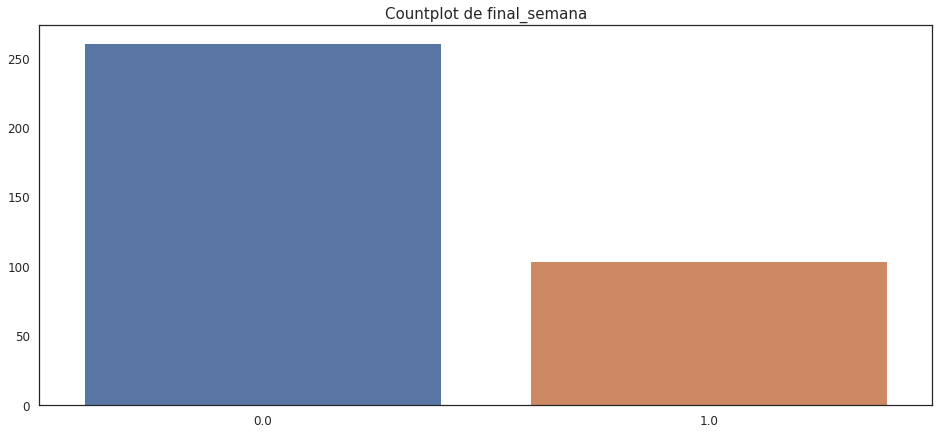

In [32]:
# contabilizando a distribuição das instâncias do atributo "final_semana" - 0: não | 1: sim
count_plot(df['final_semana'])

In [33]:
# função para visualizar a distribuição das observações - gráfico de densidade
def distribution_plotter(data, label, bin_width = 200):
    sns.set(rc = {'figure.figsize': (16, 7)})
    sns.set_style('white')

    dist = sns.histplot(data,
                        stat = 'density', kde = True,
                        line_kws = {'linewidth': 5}, 
                        binwidth = bin_width)
    
    dist.set_title('Distribuição de ' + label + '\n', fontsize = 16)

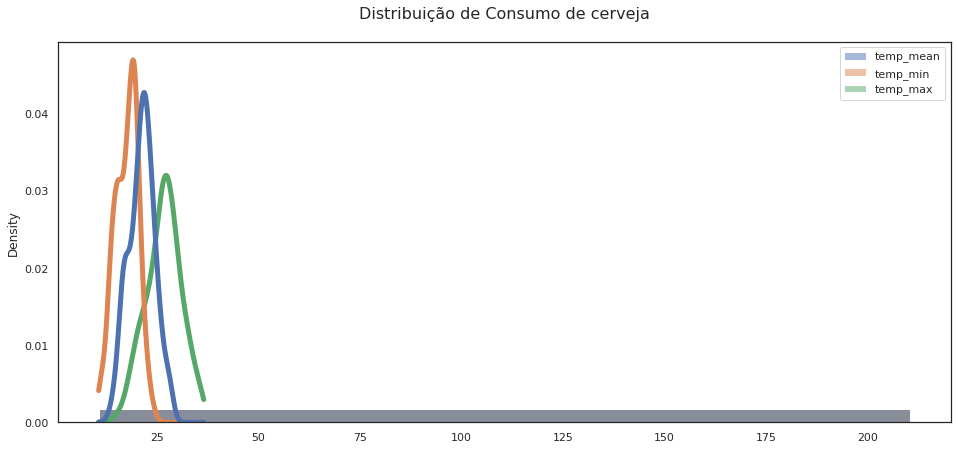

In [34]:
distribution_plotter(df[['temp_mean', 'temp_min', 'temp_max']], 'Consumo de cerveja')

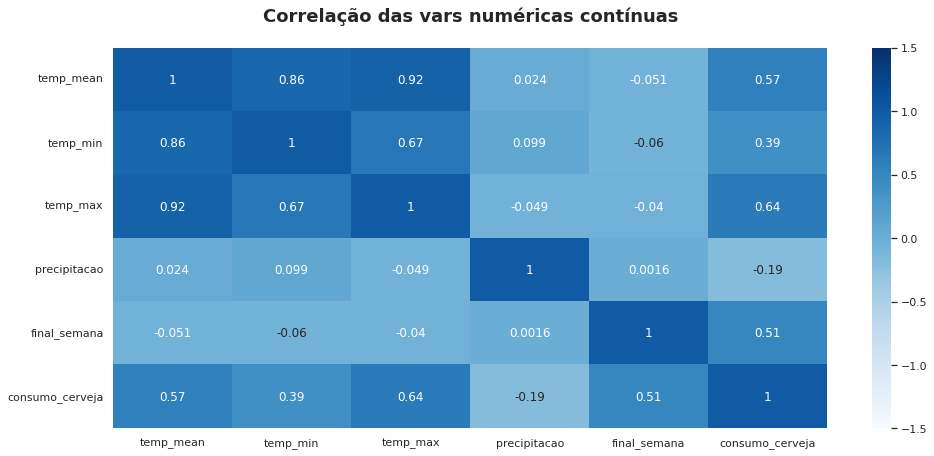

In [35]:
# com o gráfico de calor visualizando a correlação das variáveis numéricas do conjunto de dados
plt.figure(figsize = [16, 7])
sns.heatmap(df.corr(), cmap = 'Blues', vmin = -1.5, 
            annot = True, vmax = 1.5)
plt.title('Correlação das vars numéricas contínuas\n', 
          {'fontsize': 18,'fontweight': 'bold'});

In [36]:
# instanciando os atributos das medidas de temperatura - média, mínima e máxima
cols_temp = df.iloc[:, 1:4]

# visualizando 10 amostras aleatórias
cols_temp.sample(10)

,temp_mean,temp_min,temp_max
12,25.52,21.2,34.8
331,23.70,18.7,29.8
168,19.88,15.8,26.2
93,22.36,17.9,29.4
279,24.50,15.9,32.6
3,23.98,21.5,28.6
221,21.20,15.6,28.0
73,22.08,19.1,26.8
142,19.94,15.9,24.4
223,20.12,14.1,26.6


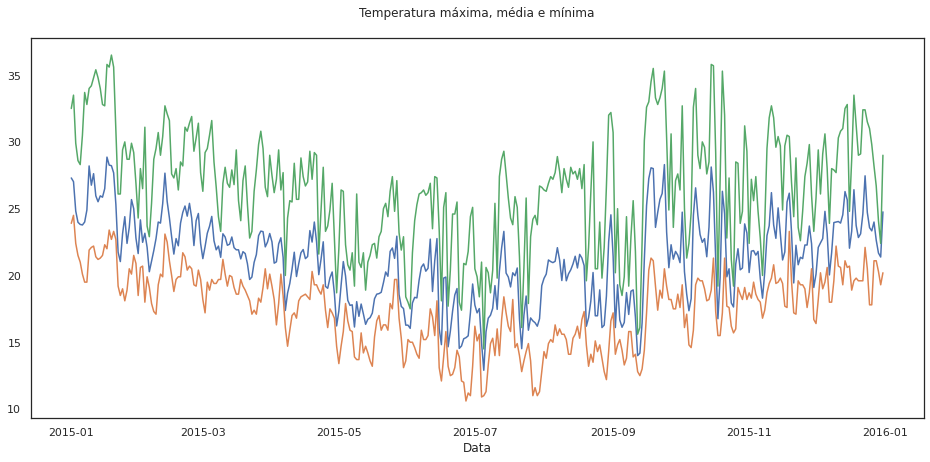

In [37]:
# visualizando a série temporal das temperaturas - média, máxima e mínima
fig, ax = plt.subplots(figsize = [16, 7])

for col in cols_temp:
    ax.plot(df['Data'], df[col])

ax.set(title = 'Temperatura máxima, média e mínima\n', 
       xlabel = 'Data');

Vamos criar uma visualização mais interativa com os dados temporais! 

In [38]:
# importando a biblioteca para plotar gráficos interativo
import plotly.graph_objects as go

In [39]:
# plotando gráfico interativo de série temporal
traces = list()

for col in cols_temp:
    trace = go.Scatter(
        x = df['Data'],
        y = df[col],
        name = col,
        mode = 'lines'
    )

    traces.append(trace)

layout = go.Layout(
    xaxis = dict(title = 'Data'),
    yaxis = dict(title = 'Temperatura'),
    title = 'Temperatura máxima, média e mínima'
)

fig = go.Figure(data = traces, layout = layout)
fig

In [40]:
# criando uma função para plotar a distribuição dos dados - gráfico de linha
def line_plot(xaxis, yaxis, dataframe, title = '', 
              figsize = [16, 7],
              xlabel = '',
              ylabel = '',
              line_color = 'b'):
    
    fig, ax = plt.subplots(figsize = figsize)
    
    ax.plot(dataframe[xaxis], dataframe[yaxis],
            color = line_color)
    
    ax.set(title = title, xlabel = xlabel, ylabel = ylabel)

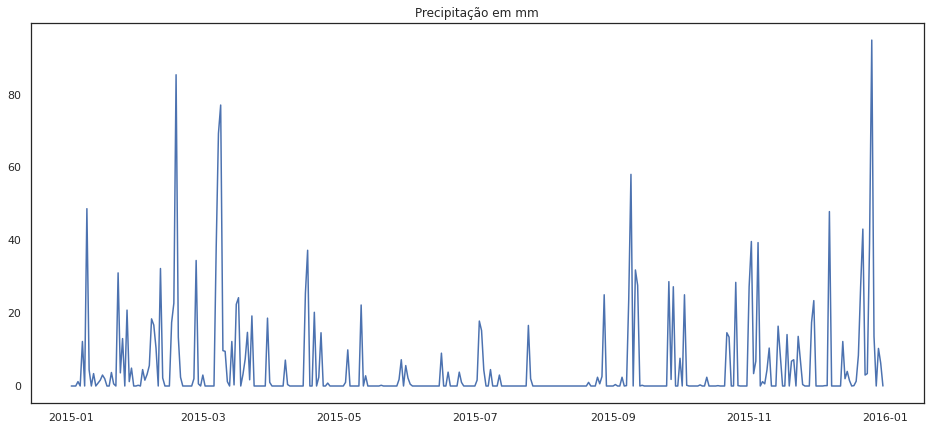

In [41]:
# gráfico de linha do atributo "precipitacao"
line_plot('Data', 'precipitacao', df, 'Precipitação em mm')

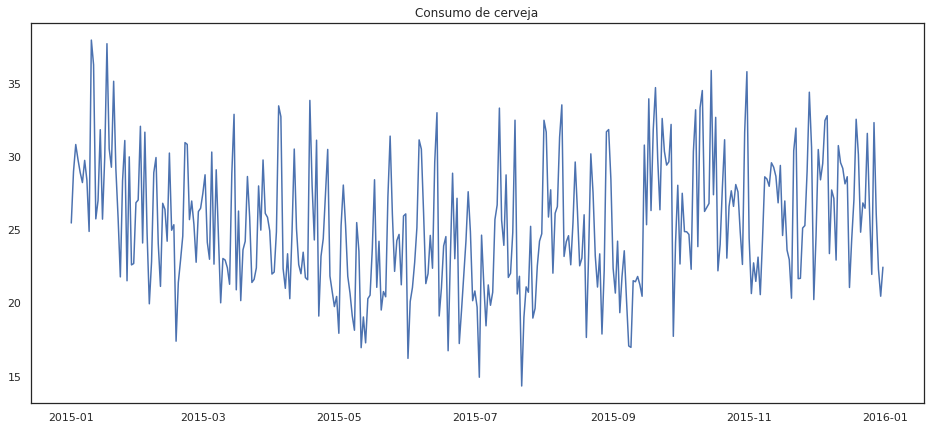

In [42]:
# gráfico de linha do atributo "consumo_cerveja"
line_plot('Data', 'consumo_cerveja', df, 'Consumo de cerveja')

In [43]:
# visualizando a correlação entre as variáveis
df.corr()

,temp_mean,temp_min,temp_max,precipitacao,final_semana,consumo_cerveja
temp_mean,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
temp_min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
temp_max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
precipitacao,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
final_semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consumo_cerveja,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


In [44]:
# função para plotar gráfico da correlação das variáveis - gráfico de calor
def heatmap_plot(dataframe, correlation_type = 'pearson',
                 title = '', annot = True, cmap = 'Blues',
                 figsize = [16, 7]):
    
    corr = dataframe.corr(method = correlation_type)
    
    fig, ax = plt.subplots(figsize = figsize)
    sns.heatmap(corr, ax = ax,
                annot = annot,
                vmax = 1.0,
                vmin = -1.0,
                cmap = cmap)
    
    ax.set(title = title)

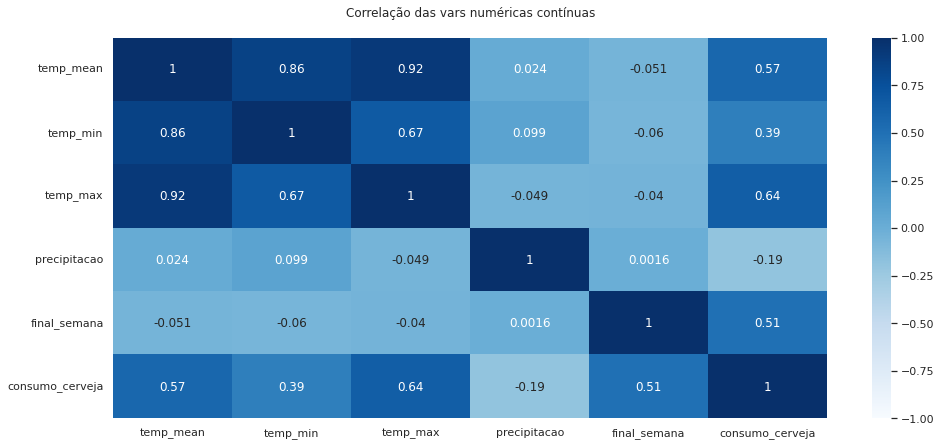

In [45]:
# utilizando a função e plotando gráfico de calor da correlação entre as variáveis
heatmap_plot(df, title = 'Correlação das vars numéricas contínuas\n')

In [46]:
# importando a biblioteca para modelagem matemática
import numpy as np

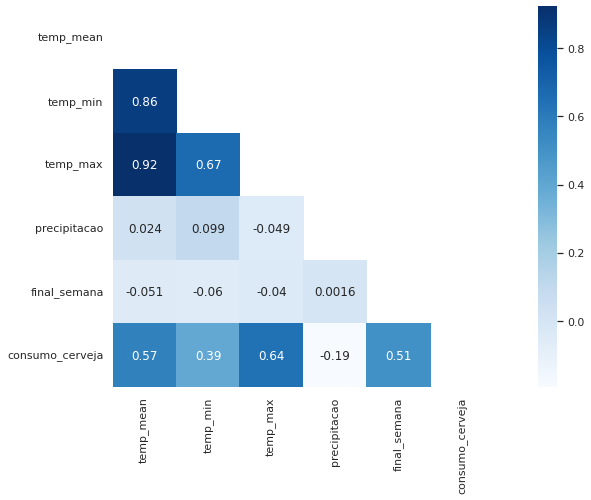

In [47]:
# plotando gráfico de calor da correlação entre as variáveis
correlation_matrix = df.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=[16, 7])

sns.heatmap(
    correlation_matrix,
    annot = True,
    mask = mask,
    square = True,
    cmap = 'Blues'
);

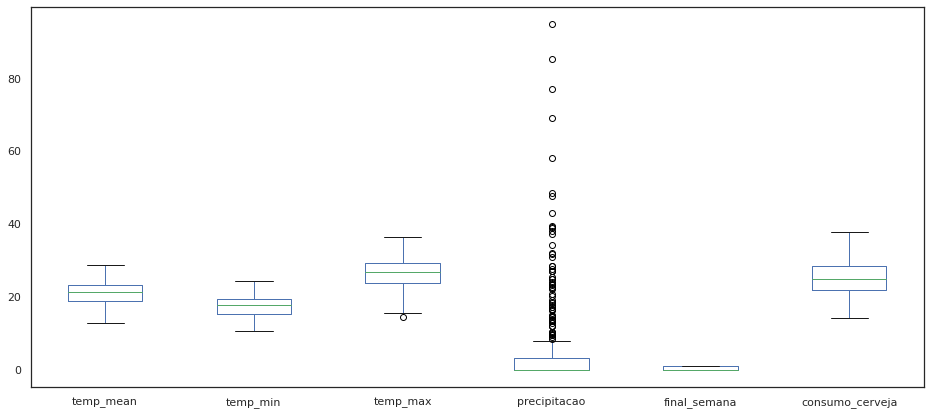

In [48]:
# gráfico de boxplot para visualizar a presença de "outliers" (valores discrepantes)
df.iloc[:, 1:].plot(kind = 'box', figsize = [16, 7]);

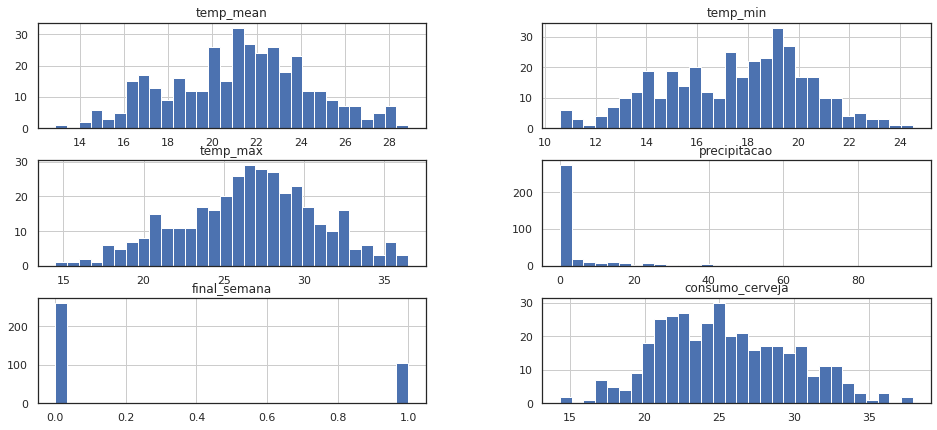

In [49]:
# plotando gráfico de histograma dos atributos
df.iloc[:, 1:].hist(figsize = [16, 7], bins = 30);

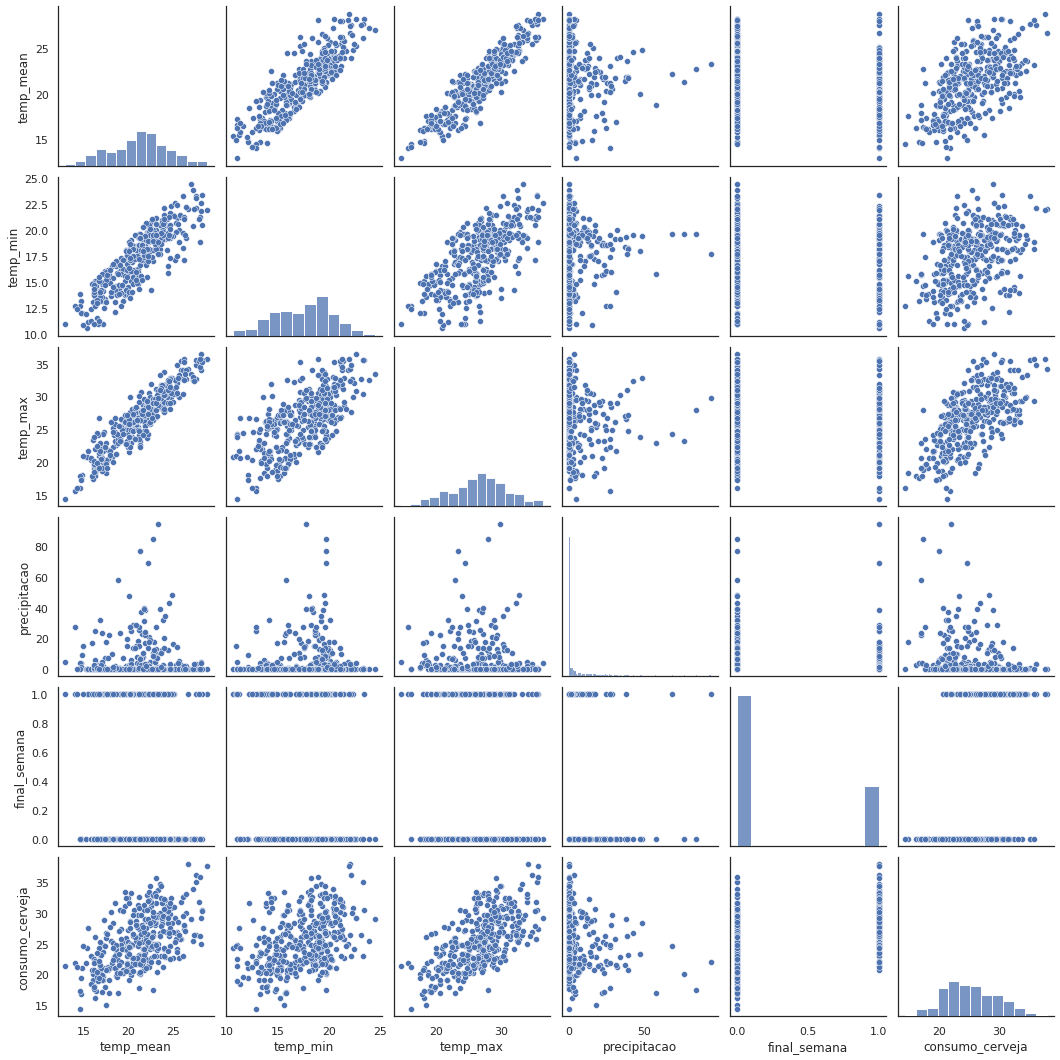

In [50]:
# utilizando a função ".paiplot()" para plotar gráficos do tipo scatter e histograma
sns.pairplot(df);

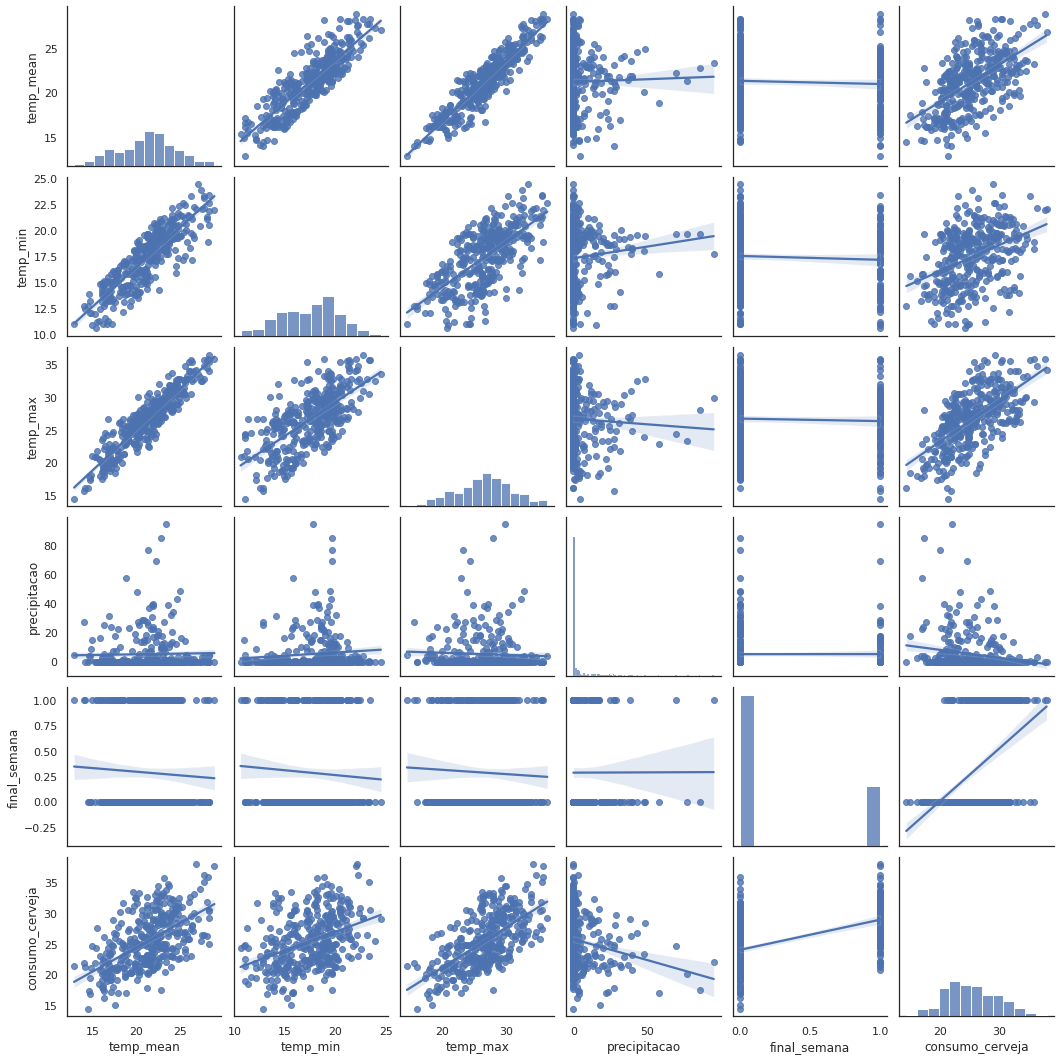

In [51]:
# utilizando a função ".paiplot()" para plotar gráficos do tipo scatter e histograma
# inserindo o argumento "kind = 'reg'" - reta estimada da regressão
sns.pairplot(df, kind = 'reg');

In [52]:
# importando a função para regressão linear
from sklearn.linear_model import LinearRegression

# importando a função para partcionamento dos dados
from sklearn.model_selection import train_test_split

In [53]:
# instanciando as variáveis explicativas (X) e a respost (y)
X = df.drop(columns = ['Data', 'consumo_cerveja'])
y = df['consumo_cerveja']

In [54]:
# particionando os dados em treino e teste - reservando 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

In [55]:
# visualizando a dimensão das partições
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((255, 5), (110, 5), (255,), (110,))

In [56]:
# instanciando o modelo de regressão linear no objeto "linear_model"
linear_model = LinearRegression()

In [57]:
# treinando o modelo com os dados de treino
linear_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# visualizando acurácia do modelo
linear_model.score(X_train, y_train)

0.7063802238832536

In [59]:
# realizando as predições com o modelo com os dados de teste
preds = linear_model.predict(X_test)

# visualizando as 20 primeiras predições
preds[:20]

array([25.60041023, 26.97117725, 28.15676471, 21.63976738, 27.27893434,
       17.9680884 , 22.52646043, 18.88477877, 18.11467917, 20.80744662,
       32.32692642, 26.88896613, 25.32979006, 25.59637121, 20.68308117,
       22.34253797, 28.16697846, 27.18762899, 24.68241004, 28.76007104])

In [60]:
# visualizando acurácia do modelo com os dados de teste
linear_model.score(X_test, y_test)

0.7437419586478451

In [61]:
# visualizando os coeficientes da regressão
linear_model.coef_

array([ 0.22915007, -0.10521557,  0.55878262, -0.05349757,  5.33691137])

In [62]:
# visualizando o intercepto da regressão
linear_model.intercept_

6.265398516782884

In [63]:
# visualizando o número de recursos (atributos) utilizados
linear_model.n_features_in_

5

In [64]:
# importando a função para cálculo do erro médio quadrático
from sklearn.metrics import  mean_squared_error

In [65]:
# calculando o erro médio quadrático
mean_squared_error(y_true = y_test, y_pred = preds)

5.589532075363929

In [66]:
# importando a biblioteca para cálculos estatísticos
import statsmodels.formula.api as smf

In [67]:
# instanciando o primeiro modelo
model_1 = smf.ols(
    formula = '''
    consumo_cerveja~temp_mean+temp_min+temp_max+precipitacao+final_semana
    ''',
    data = df
).fit()

In [68]:
# visualizando o sumário do primeiro modelo
model_1.summary(title = 'Modelo STATS MODEL #1')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Modelo STATS MODEL #1                             
==============================================================================
Dep. Variable:        consumo_cerveja   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.19e-97
Time:                        21:37:30   Log-Likelihood:                -824.07
No. Observations:                 365   AIC:                             1660.
Df Residuals:                     359   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.4447      0.845      7.627      0.000       4.783       8.107
temp_mean        0.0308      0.188      0.164      0.870      -0.339       0.401
temp_min        -0.0190      0.110     -0.172      0.863      -0.236       0.198
temp_max         0.6560      0.095      6.895      0.000       0.469       0.843
precipitacao    -0.0575      0.010     -5.726      0.000      -0.077      -0.038
final_semana     5.1832      0.271     19.126      0.000       4.650       5.716
==============================================================================
Omnibus:                       39.362   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.936
Skew:                           0.153   Prob(JB):                      0.00155
Kurtosis:                       2.130   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# instanciando o segundo modelo
model_2 = smf.ols(
    formula = '''
    consumo_cerveja~0+temp_mean+temp_min+temp_max+precipitacao+final_semana
    ''',
    data = df
).fit()

In [70]:
# visualizando o sumário do segundo modelo
model_2.summary(title = 'Modelo STATS MODEL #2')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Modelo STATS MODEL #2                                 
=======================================================================================
Dep. Variable:        consumo_cerveja   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              7620.
Date:                Sat, 04 Dec 2021   Prob (F-statistic):                        0.00
Time:                        21:37:30   Log-Likelihood:                         -851.48
No. Observations:                 365   AIC:                                      1713.
Df Residuals:                     360   BIC:                                      1732.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp_mean        0.1192      0.202      0.590      0.555      -0.278       0.516
temp_min         0.1146      0.117      0.977      0.329      -0.116       0.345
temp_max         0.7313      0.102      7.179      0.000       0.531       0.932
precipitacao    -0.0552      0.011     -5.112      0.000      -0.076      -0.034
final_semana     5.4816      0.289     18.989      0.000       4.914       6.049
==============================================================================
Omnibus:                       20.752   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.729
Skew:                          -0.175   Prob(JB):                      0.00771
Kurtosis:                       2.281   Cond. No.                         85.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# realizando as predições com os modelos

# instanciando o resultado do primeiro modelo em um dataframe "predicoes"
predicoes = pd.DataFrame(model_1.predict(), columns = ['Predições 1'])

# instanciando as predições do segundo modelo na dataframe criado
predicoes['Predições 2'] = model_2.predict()

# instanciando o atributo "consumo_cerveja" no dataframe "predicoes"
predicoes['Consumo de cerveja (litros)'] = df['consumo_cerveja']

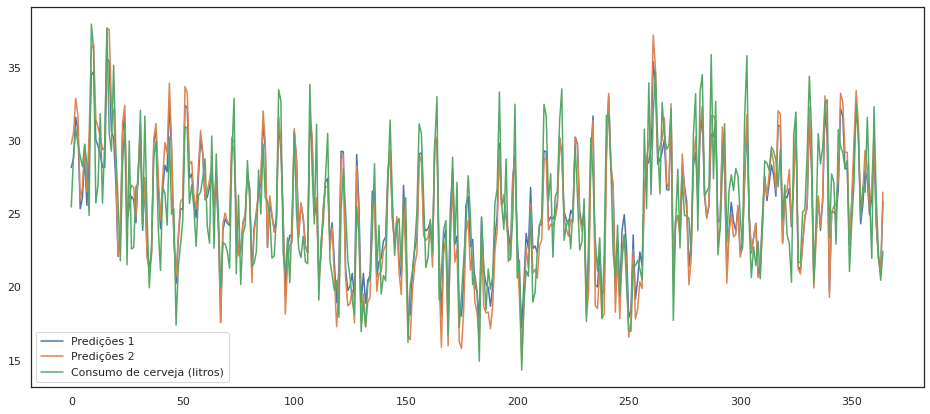

In [72]:
# visualizando as predições do primeiro e segundo modelo com as observações do atributo "consumo_cerveja"
predicoes.plot(figsize = [16, 7]);

**Referências:**

1. BUSSAB, W. O.; MORETTIN, P.A. Estatística Básica. 6. ed. São Paulo: Saraiva, 2010.
2. SARTORIS, A. Estatística e introdução à econometria. São Paulo: Saraiva, 2003.
3. Regressão Linear: https://bit.ly/32SS4eb